## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
import pandas as pd

df = pd.read_csv("C:/Projects/applied-ml-kersha/example01/automobile_price_data3.csv")

print(df.head())  # Display the first few rows



   normalized-losses         make      fuel doors         body drive  weight  \
0                NaN  alfa-romero  unleaded   two  convertible   rwd    2548   
1                NaN  alfa-romero  unleaded   two  convertible   rwd    2548   
2                NaN  alfa-romero  unleaded   two    hatchback   rwd    2823   
3              164.0         audi  unleaded  four       saloon   fwd    2337   
4              164.0         audi  unleaded  four       saloon   4wd    2824   

   engine-size    bhp  mpg    price  
0          130  111.0   27  13495.0  
1          130  111.0   27  16500.0  
2          152  154.0   26  16500.0  
3          109  102.0   30  13950.0  
4          136  115.0   22  17450.0  


In [8]:
print(df.isnull().sum())  # Count missing values per column


normalized-losses    41
make                  0
fuel                  0
doors                 2
body                  0
drive                 0
weight                0
engine-size           0
bhp                   2
mpg                   0
price                 4
dtype: int64


## Handle normalized-losses (41 missing)

In [9]:
df.drop(columns=["normalized-losses"], inplace=True)


In [12]:
print(df.columns)


Index(['make', 'fuel', 'doors', 'body', 'drive', 'weight', 'engine-size',
       'bhp', 'mpg', 'price'],
      dtype='object')


In [14]:
# Fill missing values correctly without inplace=True
df["doors"] = df["doors"].fillna(df["doors"].mode()[0])  # Replace missing doors with the most common value
df["bhp"] = df["bhp"].fillna(df["bhp"].median())  # Replace missing bhp with median
df["price"] = df["price"].fillna(df["price"].median())  # Replace missing price with median

print("✅ Missing values filled successfully!")
print(df.isnull().sum())  # Confirm no missing values remain


✅ Missing values filled successfully!
make           0
fuel           0
doors          0
body           0
drive          0
weight         0
engine-size    0
bhp            0
mpg            0
price          0
dtype: int64


## Preprocess Data

In [16]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical variables to numerical using One-Hot Encoding
df = pd.get_dummies(df, columns=["make", "fuel", "body", "drive"], drop_first=True)

# Display processed dataset
print(df.head())


  doors  weight  engine-size    bhp  mpg    price  make_audi  make_bmw  \
0   two    2548          130  111.0   27  13495.0      False     False   
1   two    2548          130  111.0   27  16500.0      False     False   
2   two    2823          152  154.0   26  16500.0      False     False   
3  four    2337          109  102.0   30  13950.0       True     False   
4  four    2824          136  115.0   22  17450.0       True     False   

   make_chevrolet  make_dodge  ...  make_toyota  make_volkswagen  make_volvo  \
0           False       False  ...        False            False       False   
1           False       False  ...        False            False       False   
2           False       False  ...        False            False       False   
3           False       False  ...        False            False       False   
4           False       False  ...        False            False       False   

   fuel_unleaded  body_hardtop  body_hatchback  body_saloon  body_wagon  \

In [20]:
print(df.dtypes)


doors                  object
weight                  int64
engine-size             int64
bhp                   float64
mpg                     int64
price                 float64
make_audi                bool
make_bmw                 bool
make_chevrolet           bool
make_dodge               bool
make_honda               bool
make_isuzu               bool
make_jaguar              bool
make_mazda               bool
make_mercedes-benz       bool
make_mercury             bool
make_mitsubishi          bool
make_nissan              bool
make_peugot              bool
make_plymouth            bool
make_porsche             bool
make_renault             bool
make_saab                bool
make_subaru              bool
make_toyota              bool
make_volkswagen          bool
make_volvo               bool
fuel_unleaded            bool
body_hardtop             bool
body_hatchback           bool
body_saloon              bool
body_wagon               bool
drive_fwd                bool
drive_rwd 

## Convert "doors" to Numeric

In [23]:
df["doors"] = df["doors"].replace({"two": 2, "three": 3, "four": 4, "five": 5}).astype("Int64")

## Features (X) and Target (y)

In [17]:
X = df.drop(columns=["price"])  # Features (exclude the target column)
y = df["price"]  # Target (what we are predicting)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define Features (X) and Target (y)
X = df.drop(columns=["price"])  # Exclude the target variable
y = df["price"]

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
from sklearn.metrics import mean_squared_error, r2_score
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")



R-squared: 0.81
Mean Squared Error: 14933266.66


## Check Feature Importance

Identify which features have the most impact on price using the model's coefficients:

In [27]:
feature_importance = pd.DataFrame(
    {"Feature": X_train.columns, "Coefficient": model.coef_}
).sort_values(by="Coefficient", ascending=False)

print(feature_importance)


               Feature   Coefficient
13  make_mercedes-benz  12303.402841
11         make_jaguar  10316.649781
19        make_porsche   9170.536475
6             make_bmw   8775.765894
5            make_audi   5224.543640
25          make_volvo   4297.236128
21           make_saab   4187.576033
14        make_mercury   2596.570423
7       make_chevrolet   1927.016591
12          make_mazda   1555.405961
32           drive_rwd   1172.329613
9           make_honda    853.035556
24     make_volkswagen    768.600209
16         make_nissan    679.882518
10          make_isuzu    586.146496
31           drive_fwd    458.020805
0                doors    335.632191
17         make_peugot    268.596993
8           make_dodge    179.696632
2          engine-size     40.880163
1               weight      2.589115
3                  bhp     -0.270429
27        body_hardtop    -23.482739
15     make_mitsubishi   -103.902473
18       make_plymouth   -128.541334
4                  mpg   -229.656627
2

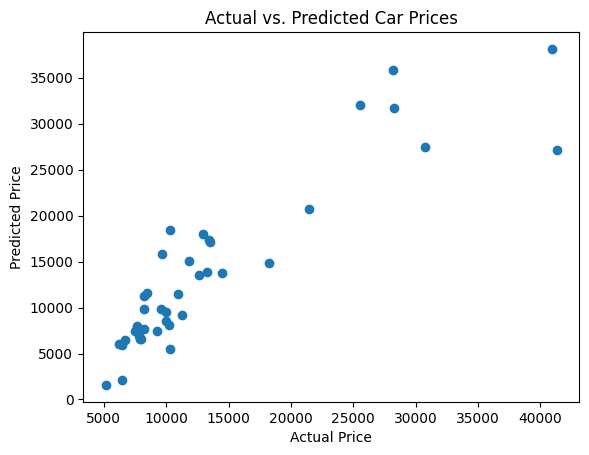

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.show()


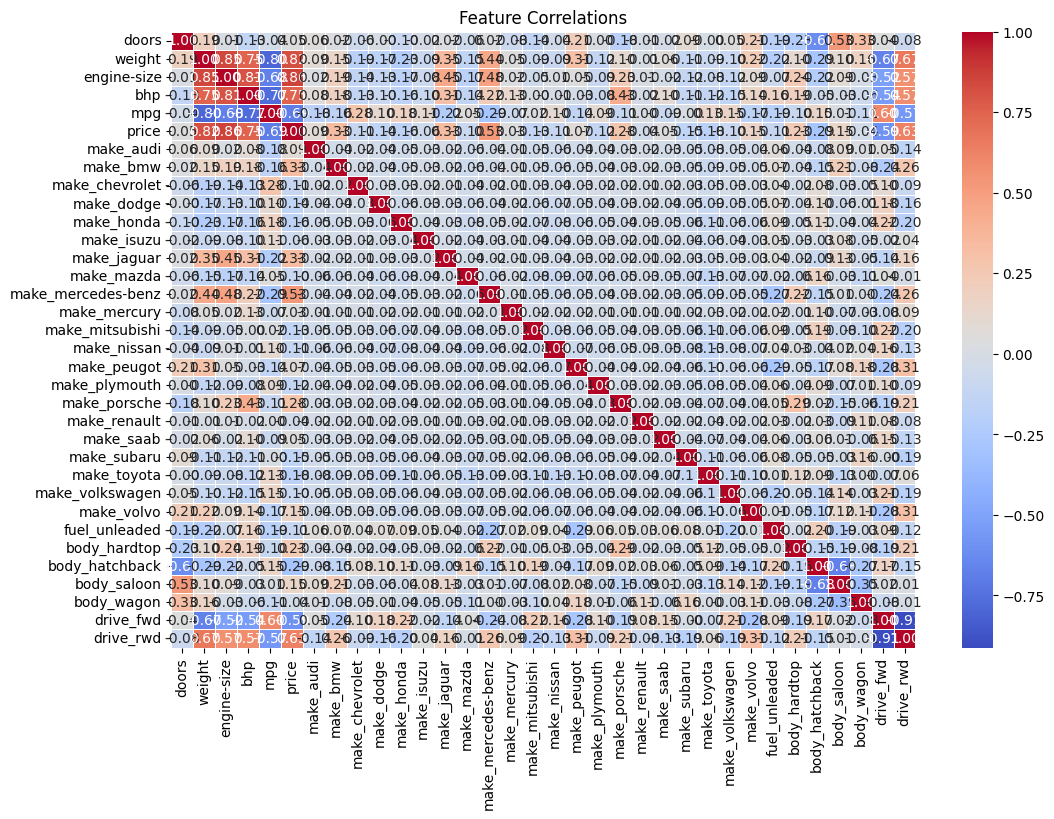

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()


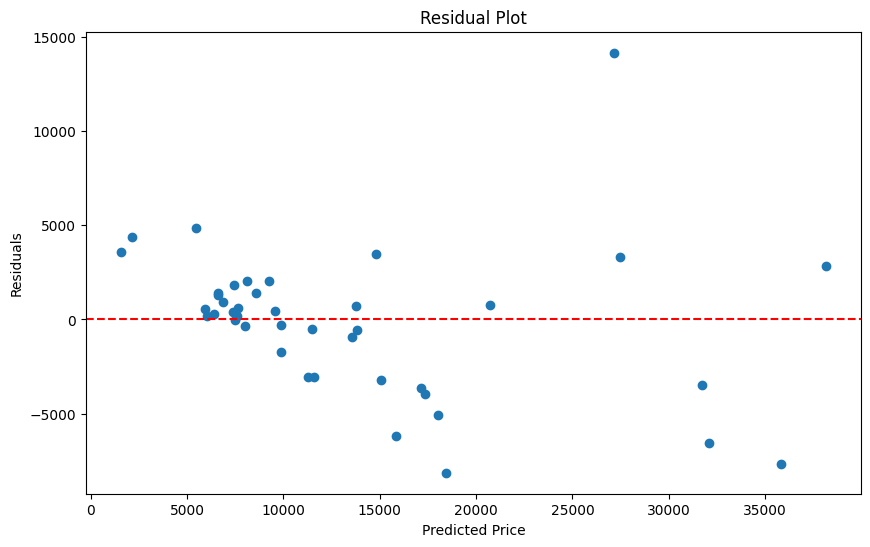

In [30]:
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate new model
from sklearn.metrics import r2_score, mean_squared_error

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R-squared: {r2_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")


Random Forest R-squared: 0.93
Random Forest MSE: 5850596.63
